In [1]:
import geopandas as gpd
import pandas as pd

## Loading street image coordinates

In [2]:
df = pd.read_csv('data/csv/newParanaque_saved_coordinates.csv')
df

,X,Y
0,120.984143,14.533076
1,120.983244,14.520337
2,121.001600,14.451343
3,121.001111,14.445416
4,121.000857,14.443456
...,...,...
567,121.000234,14.476116
568,121.000889,14.522531
569,121.000995,14.520438
570,121.000956,14.518549


In [3]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
len(street_points)

572

In [4]:
street_points.insert(0, 'point_id', range(0, 0 + len(street_points)))

## Displaying Paranaque map

In [5]:
philippines = gpd.read_file('maps/phl_admbnda_adm4_psa_namria_20231106.zip')

<AxesSubplot:>

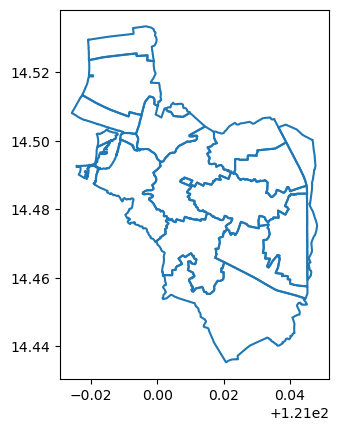

In [6]:

paranaque = philippines[philippines['ADM3_EN'] == 'City of Parañaque']
paranaque.boundary.plot()

## Plotting the street points onto the map

<AxesSubplot:>

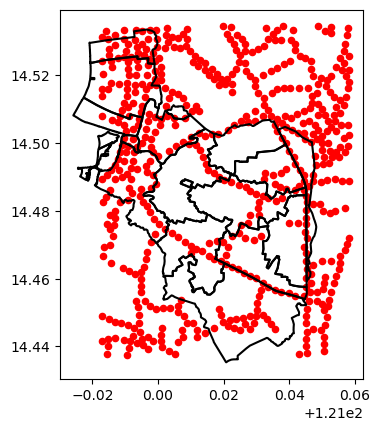

In [7]:
base = paranaque.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=20, color='red')

In [8]:
clipped = gpd.clip(street_points, paranaque)
len(clipped)

243

In [9]:
clipped

,point_id,geometry
239,239,POINT (121.03551 14.44519)
228,228,POINT (121.03436 14.44665)
222,222,POINT (121.03317 14.44805)
295,295,POINT (121.04462 14.45474)
274,274,POINT (121.04171 14.45499)
...,...,...
32,32,POINT (121.00479 14.50729)
550,550,POINT (120.99897 14.50770)
15,15,POINT (121.00275 14.50796)
531,531,POINT (120.99729 14.50851)


<AxesSubplot:>

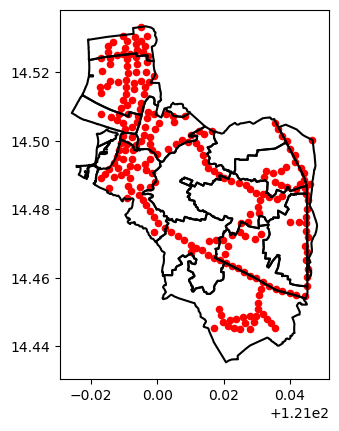

In [10]:
base = paranaque.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=20, color='red')

In [11]:
len(clipped)

243

In [12]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/paranaque_filtered_coordinates.csv', index=False)

## Analyzing street point data

In [13]:
joined = gpd.sjoin(paranaque, street_points, how='left', predicate='contains')
joined.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,index_right,point_id
35242,Baclaran,PH1307604001,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",520,520
35242,Baclaran,PH1307604001,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",528,528
35242,Baclaran,PH1307604001,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",459,459
35242,Baclaran,PH1307604001,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",510,510
35242,Baclaran,PH1307604001,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",476,476


In [14]:
average_images = joined.groupby('ADM4_EN')['point_id'].mean()
average_images

ADM4_EN
B. F. Homes              175.038462
Baclaran                 424.578947
Don Bosco                194.250000
Don Galo                 301.222222
La Huerta                408.000000
Marcelo Green Village    300.750000
Merville                 237.000000
Moonwalk                  87.083333
San Antonio              185.950000
San Dionisio             383.289474
San Isidro                75.090909
San Martin de Porres     290.900000
Santo Niño               367.611111
Sun Valley               251.250000
Tambo                    375.545455
Vitalez                   54.000000
Name: point_id, dtype: float64

In [15]:
grouped = joined.groupby('ADM4_EN')['point_id'].count().sort_values(ascending=True)
grouped

ADM4_EN
Vitalez                   1
La Huerta                 3
Merville                  3
Don Galo                  9
San Martin de Porres     10
San Isidro               11
Marcelo Green Village    12
Moonwalk                 12
Sun Valley               12
Don Bosco                16
Santo Niño               18
Baclaran                 19
San Antonio              20
B. F. Homes              26
Tambo                    33
San Dionisio             38
Name: point_id, dtype: int64

Text(0.5, 1.0, 'Number of images per barangay in Paranaque')

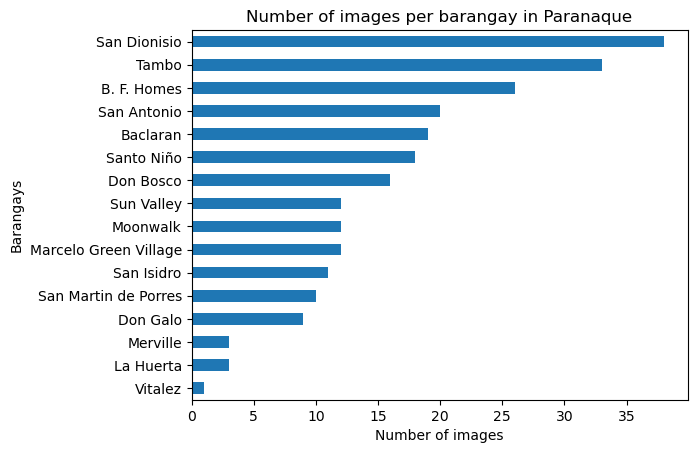

In [16]:
ax = grouped.plot.barh()
ax.set_xlabel('Number of images')
ax.set_ylabel('Barangays')
ax.set_title('Number of images per barangay in Paranaque')

In [17]:
total_street_points = joined.groupby('ADM4_EN')['geometry'].count().sum()
total_street_points

243

In [18]:
paranaque.set_index('ADM4_EN', inplace=True)
paranaque.head()

,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
ADM4_EN,,,,,,,,,,,,,,,,,
Baclaran,PH1307604001,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533..."
Don Galo,PH1307604002,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.074075,0.000128,1.521667,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ..."
La Huerta,PH1307604003,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.020239,0.000016,0.195954,"POLYGON ((120.99000 14.50229, 120.99035 14.502..."
San Dionisio,PH1307604004,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.172941,0.000327,3.905538,"POLYGON ((120.98936 14.50019, 120.98955 14.500..."
Santo Niño,PH1307604005,Santo Nino,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.074894,0.000202,2.411879,"POLYGON ((120.99854 14.51277, 120.99893 14.512..."


In [19]:
paranaque['streetimage_count'] = joined.groupby('ADM4_EN')['point_id'].count()
paranaque.head()

C:\Users\Daniel\miniconda3\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
ADM4_EN,,,,,,,,,,,,,,,,,,
Baclaran,PH1307604001,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",19
Don Galo,PH1307604002,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.074075,0.000128,1.521667,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ...",9
La Huerta,PH1307604003,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.020239,0.000016,0.195954,"POLYGON ((120.99000 14.50229, 120.99035 14.502...",3
San Dionisio,PH1307604004,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.172941,0.000327,3.905538,"POLYGON ((120.98936 14.50019, 120.98955 14.500...",38
Santo Niño,PH1307604005,Santo Nino,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.074894,0.000202,2.411879,"POLYGON ((120.99854 14.51277, 120.99893 14.512...",18


<AxesSubplot:>

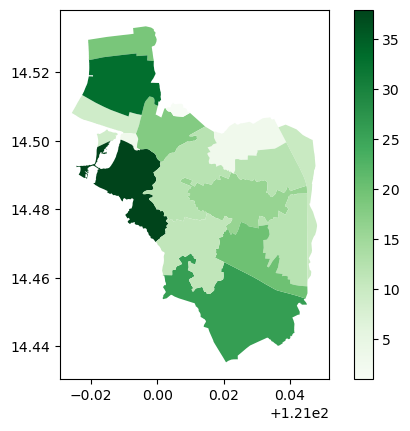

In [20]:
paranaque.plot(column='streetimage_count', cmap='Greens', legend=True)

In [21]:
paranaque.reset_index(inplace=True)
paranaque.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
0,Baclaran,PH1307604001,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",19
1,Don Galo,PH1307604002,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.074075,0.000128,1.521667,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ...",9
2,La Huerta,PH1307604003,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.020239,0.000016,0.195954,"POLYGON ((120.99000 14.50229, 120.99035 14.502...",3
3,San Dionisio,PH1307604004,None,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.172941,0.000327,3.905538,"POLYGON ((120.98936 14.50019, 120.98955 14.500...",38
4,Santo Niño,PH1307604005,Santo Nino,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,None,0.074894,0.000202,2.411879,"POLYGON ((120.99854 14.51277, 120.99893 14.512...",18


### Paranaque Rent

In [29]:
df = pd.read_csv('data/csv/paranaque_rent_model_completed_data.csv')
# Remove  duplicates based on 'Column1' only
df = df.drop_duplicates(subset=['link'], keep='first')
print(df)

                                                  link  bedrooms  baths  \
0    https://www.lamudi.com.ph/alpina-heights-condo...         2    1.0   
1    https://www.lamudi.com.ph/alpina-heights-condo...         1    1.0   
2    https://www.lamudi.com.ph/alpina-heights-condo...         1    1.0   
3    https://www.lamudi.com.ph/2br-condo-unit-fully...         2    1.0   
4    https://www.lamudi.com.ph/merville-house-for-r...         5    NaN   
..                                                 ...       ...    ...   
840  https://www.lamudi.com.ph/4-bedroom-house-5-t-...         4    NaN   
841  https://www.lamudi.com.ph/for-rent-fully-furni...         3    NaN   
842  https://www.lamudi.com.ph/fully-furnished-2-be...         2    NaN   
843  https://www.lamudi.com.ph/for-rent-1-bedroom-u...         1    1.0   
844  https://www.lamudi.com.ph/bf-homes-house-for-r...         3    NaN   

     floor area               condominium name  cctv  air conditioning  \
0          41.2     Alpin

In [23]:
properties_df = df
# Create a GeoDataFrame for properties
properties_gdf = gpd.GeoDataFrame(properties_df,
                                   geometry=gpd.points_from_xy(properties_df['longitude'],
                                                               properties_df['latitude']),
                                   crs='EPSG:4326')  # Specify the coordinate reference system

# Perform a spatial join
joined_gdf = gpd.sjoin(properties_gdf, paranaque, how='inner', op='within')

# The 'ADM4_EN' column in 'joined_gdf' contains the city names
# create a new column in 'properties_df' to store the city information
properties_df['barangay'] = joined_gdf['ADM4_EN']
# Calculate the average property price per city
average_price_per_city = joined_gdf.groupby('ADM4_EN')['price'].mean().reset_index()

print(average_price_per_city)

                  ADM4_EN          price
0             B. F. Homes   85270.053476
1                Baclaran  144684.210526
2               Don Bosco   72142.857143
3   Marcelo Green Village   35187.468750
4                Merville   91103.092784
5                Moonwalk  155630.508475
6             San Antonio   30440.000000
7              San Isidro   38448.979592
8    San Martin de Porres   46900.000000
9              Santo Niño   28431.818182
10             Sun Valley   45454.545455
11                  Tambo  111013.062937
12                Vitalez   19000.000000


C:\Users\Daniel\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


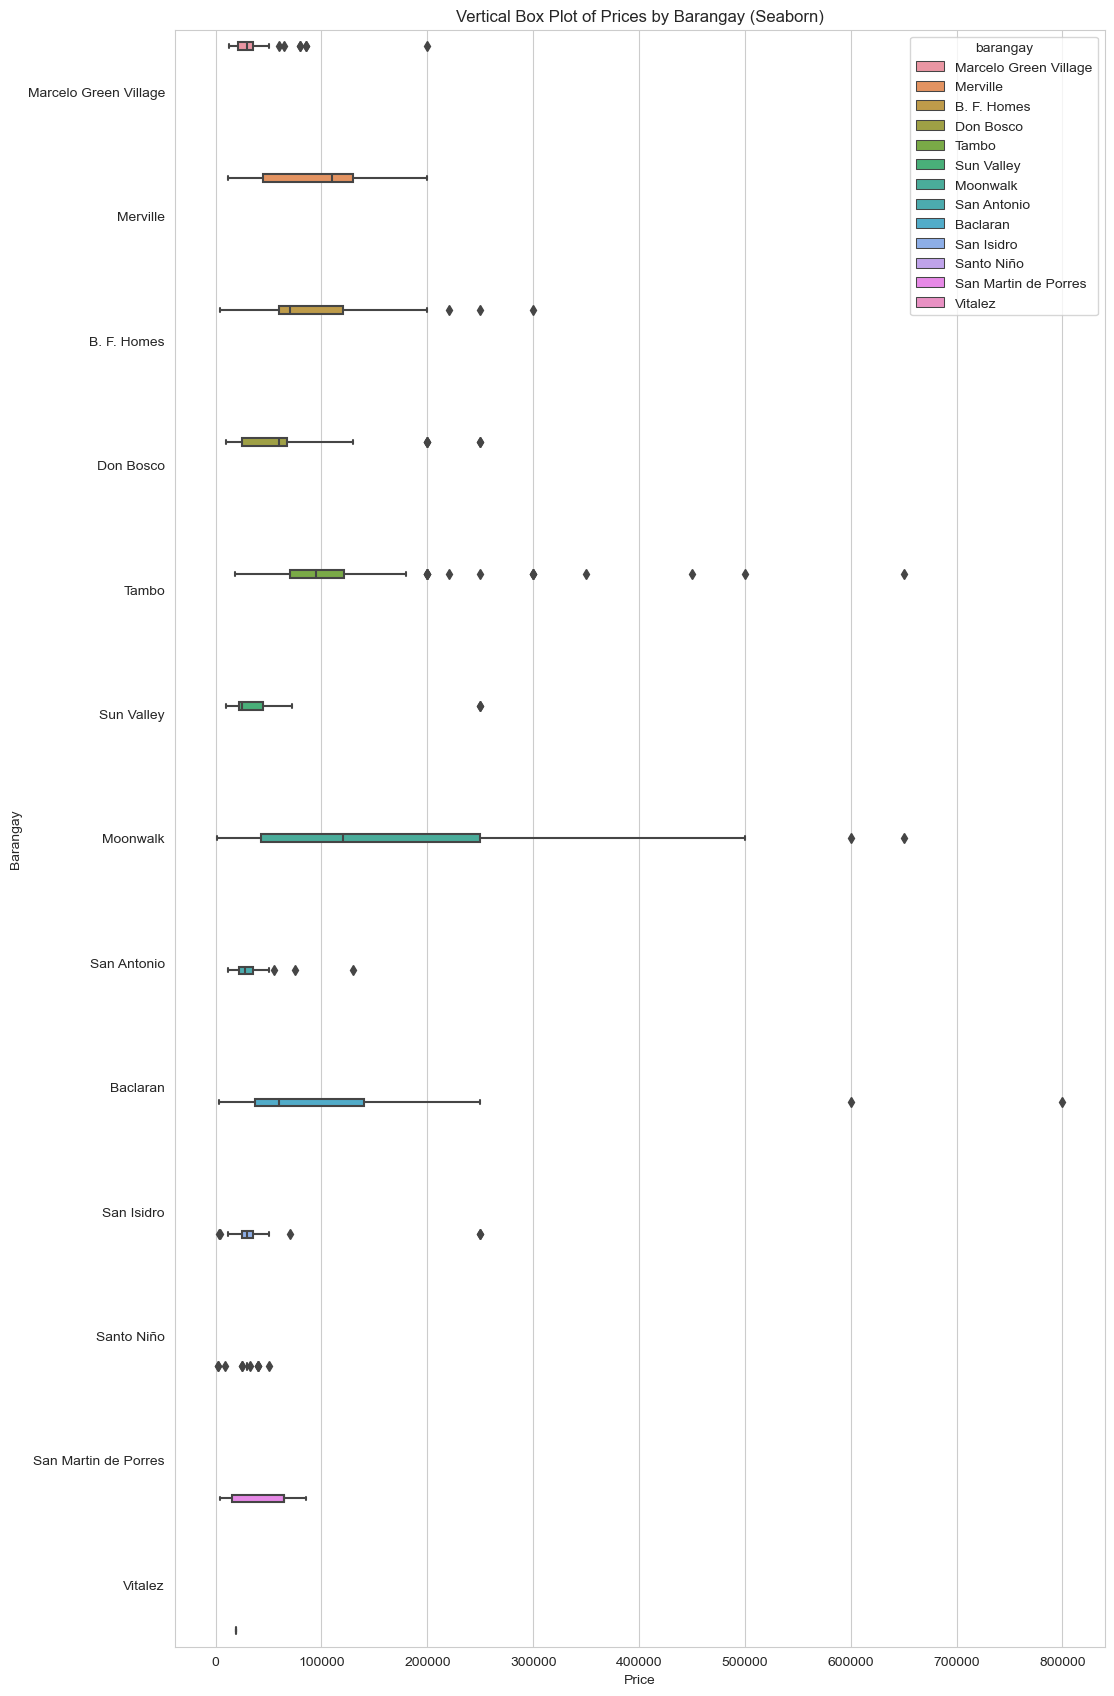

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
# Create a larger figure by adjusting the figsize parameter
fig, ax = plt.subplots(figsize=(12, 21))
sns.boxplot(x='price', y='barangay', data=properties_df, hue='barangay', dodge=True)  # Adjust width

plt.xlabel("Price")
plt.ylabel("Barangay")
plt.title("Vertical Box Plot of Prices by Barangay (Seaborn)")
plt.show()

### Paranaque Buy

In [30]:
df = pd.read_csv('data/csv/paranaque_buy_model_completed_data.csv')
# Remove  duplicates based on 'Column1' only
df = df.drop_duplicates(subset=['link'], keep='first')


In [31]:
properties_df = df
# Create a GeoDataFrame for properties
properties_gdf = gpd.GeoDataFrame(properties_df,
                                   geometry=gpd.points_from_xy(properties_df['longitude'],
                                                               properties_df['latitude']),
                                   crs='EPSG:4326')  # Specify the coordinate reference system

# Perform a spatial join
joined_gdf = gpd.sjoin(properties_gdf, paranaque, how='inner', op='within')

# The 'ADM4_EN' column in 'joined_gdf' contains the city names
# create a new column in 'properties_df' to store the city information
properties_df['barangay'] = joined_gdf['ADM4_EN']
# Calculate the average property price per city
average_price_per_city = joined_gdf.groupby('ADM4_EN')['price'].mean().reset_index()

print(average_price_per_city)

                  ADM4_EN         price
0             B. F. Homes  3.205310e+07
1                Baclaran  4.628571e+07
2               Don Bosco  1.488124e+07
3               La Huerta  4.064383e+06
4   Marcelo Green Village  1.314364e+07
5                Merville  3.160528e+07
6                Moonwalk  5.629704e+07
7             San Antonio  7.646353e+06
8              San Isidro  9.696800e+06
9    San Martin de Porres  4.356667e+07
10             Santo Niño  7.218554e+06
11             Sun Valley  1.462424e+07
12                  Tambo  2.029649e+07


C:\Users\Daniel\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


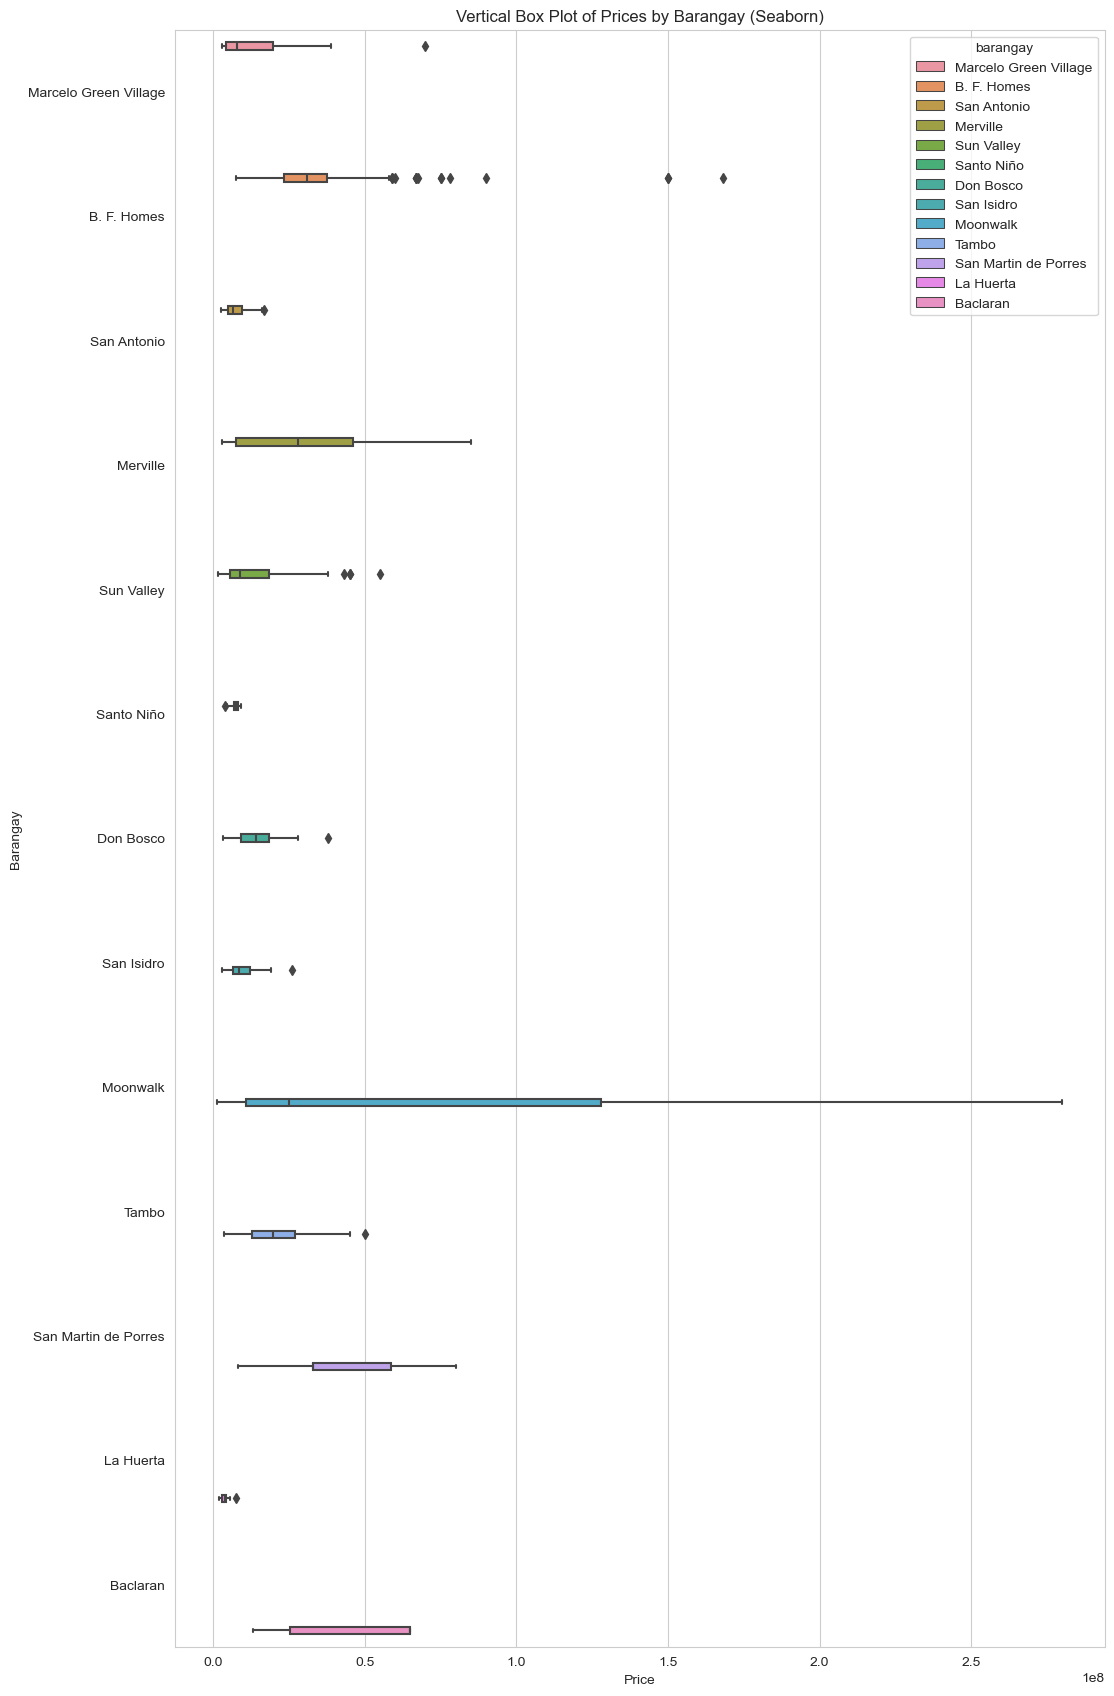

In [32]:
sns.set_style("whitegrid")
# Create a larger figure by adjusting the figsize parameter
fig, ax = plt.subplots(figsize=(12, 21))
sns.boxplot(x='price', y='barangay', data=properties_df, hue='barangay', dodge=True)  # Adjust width

plt.xlabel("Price")
plt.ylabel("Barangay")
plt.title("Vertical Box Plot of Prices by Barangay (Seaborn)")
plt.show()